In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
np.shape(x_train)

(60000, 28, 28)

In [11]:
np.shape(x_test)

(10000, 28, 28)

In [5]:
print(x_train[0].round(1))

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.1 0.5 0.5
  0.7 0.1 0.7 1.  1.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.1 0.4 0.6 0.7 1.  1.  1.  1.  1.
  0.9 0.7 1.  0.9 0.8 0.3 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.2 0.9 1.  1.  1.  1.  1.  1.  1.  1.  1.
  0.4 0.3 0.3 0.2 0.2 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.9 1.  1.  1.  1.  1.  0.8 0.7 1.  0

7

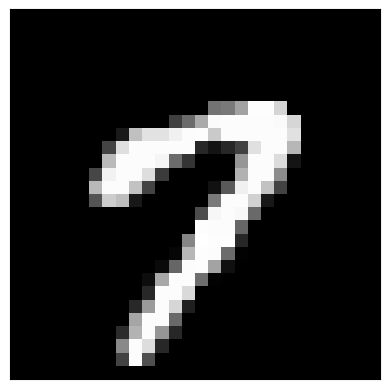

In [23]:
plt.imshow(x_train[15],cmap='grey')
plt.xticks([])
plt.yticks([]) #these two lines remove the ticks on the axes
y_train[15]

In [24]:
clf = LogisticRegression(C=1e15,
                         multi_class='multinomial', penalty='l2',solver='sag', tol=0.01)
# fit data
clf.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])

# compute accuracy
score = clf.score(np.array(x_test).reshape((10000,784)), y_test)

c:\Users\fayza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
score

0.9028

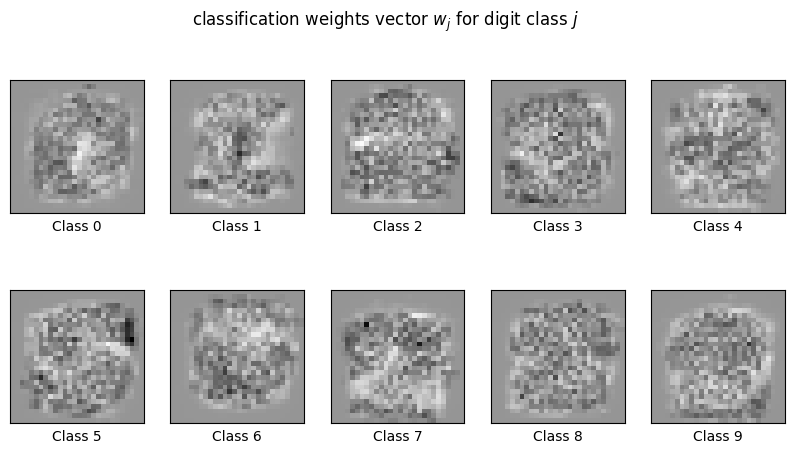

In [26]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l2_plot = plt.subplot(2, 5, i + 1)
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('classification weights vector $w_j$ for digit class $j$')

plt.show()

In [27]:
score

0.9028

In [ ]:
y_pred=clf.predict(np.array(x_test).reshape((10000,784))[:100])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       2, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 1, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [65]:
y_test[:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [68]:
diff=[]
for i in range(100):
    if y_test[i]!=y_pred[i]:
        diff.append(i)

print(diff)

[8, 11, 18, 66, 77]


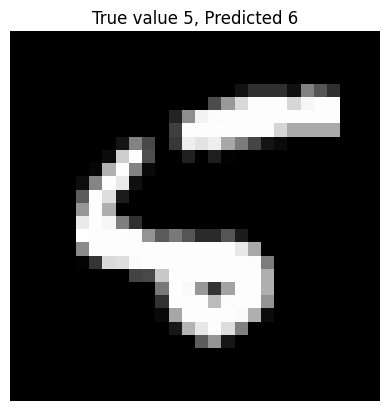

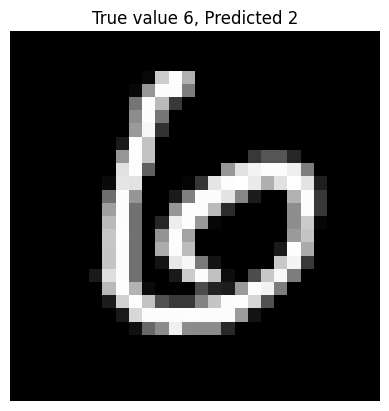

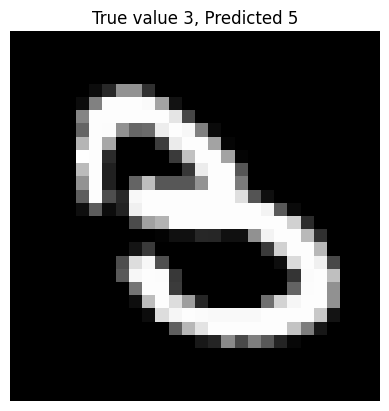

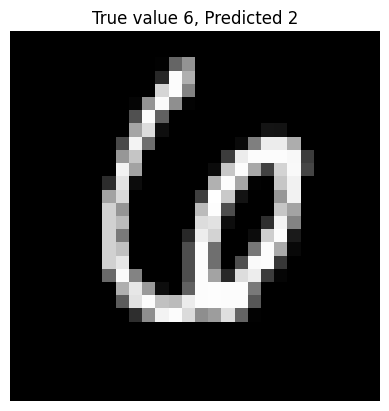

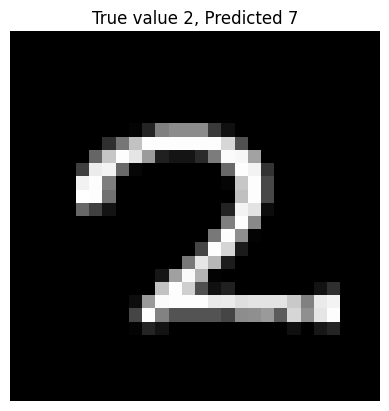

In [70]:
def im_sample(image_data,true_label,predicted_label):
    plt.imshow(image_data.reshape(28,28), cmap='grey')
    plt.title(f'True value {true_label}, Predicted {predicted_label}')
    plt.axis('off')
    plt.show()
for i in diff:
    im_sample(x_test[i],y_test[i],y_pred[i])

SGDClassifier

In [71]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier()

# fit data
sgd_clf.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])

# compute accuracy
score = sgd_clf.score(np.array(x_test).reshape((10000,784)), y_test)

In [73]:
score

0.8907

In [78]:
sgd_clf.predict(np.array(x_test).reshape((10000,784))[:100])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 2, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 4, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4,
       2, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 9, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

In [79]:
from sklearn.metrics import accuracy_score

y_pred2=sgd_clf.predict(np.array(x_test).reshape((10000,784)[:100]))
#accuracy=number of correctly predicted digits/total
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [80]:
diff2=[]
for i in range(100):
    if y_test[i]!=y_pred2[i]:
        diff2.append(i)

print(diff2)

[8, 11, 52, 63, 66, 73, 77]


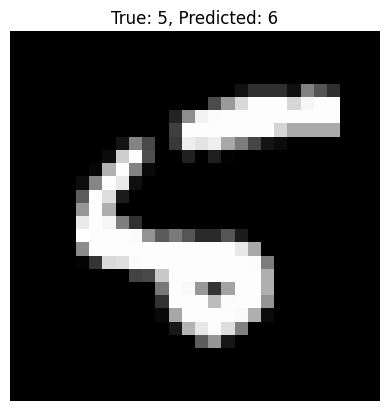

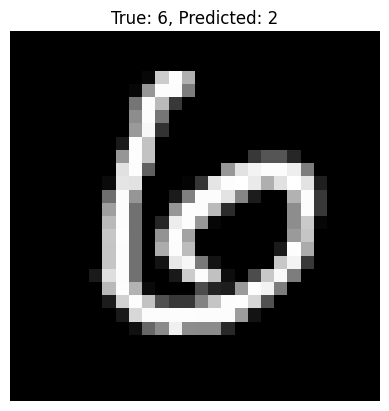

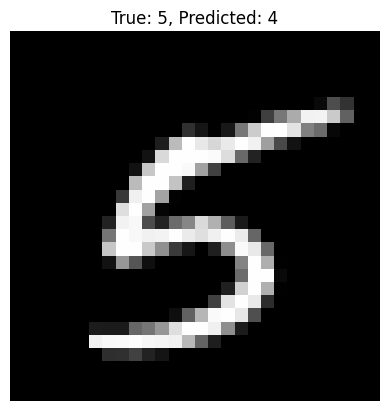

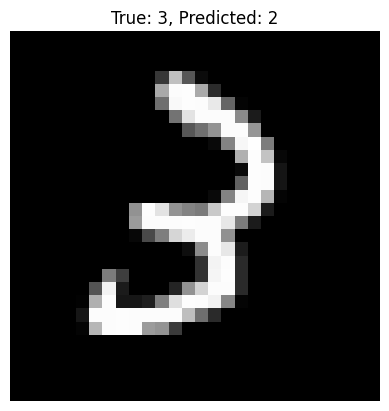

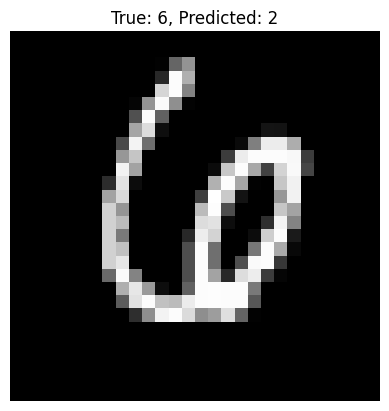

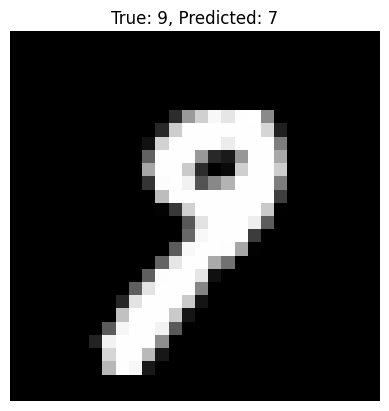

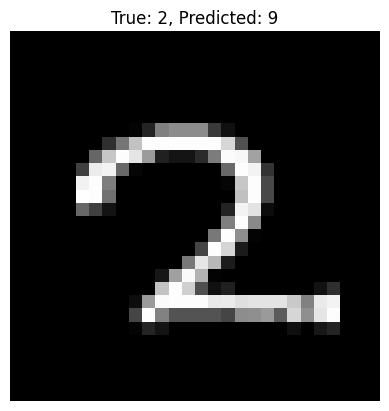

In [81]:
def plot_sample(image_data, true_label, predicted_label):
    plt.imshow(image_data.reshape(28, 28), cmap="gray")
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

for i in diff2:
    plot_sample(x_test[i], y_test[i], y_pred2[i])


In [58]:
# define error lists
train_errors_leastsq = []
test_errors_leastsq = []

train_errors_ridge = []
test_errors_ridge = []

train_errors_lasso = []
test_errors_lasso = []

train_errors_en = []
test_errors_en = []

# set regularisation  strength values
lmbdas = [10**(i) for i in range (-4,5)]

#No regularisation
leastsq=SGDClassifier()
leastsq.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])
# use the coefficient of determination R^2 as the performance of prediction.
train_errors_leastsq=[leastsq.score(np.array(x_train).reshape((60000,784)), y_train) for _ in lmbdas]
test_errors_leastsq=[leastsq.score(np.array(x_test).reshape((10000,784)),y_test) for _ in lmbdas]


for i in range(-4,5):
    #l2 regularisation
    ridge=SGDClassifier(penalty='l2',alpha=10**(i))
    ridge.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(np.array(x_train).reshape((60000,784)), y_train))
    test_errors_ridge.append(ridge.score(np.array(x_test).reshape((10000,784)),y_test))

    #l1 regularisation
    lasso=SGDClassifier(penalty='l1',alpha=10**(i))
    lasso.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_lasso.append(lasso.score(np.array(x_train).reshape((60000,784)), y_train))
    test_errors_lasso.append(lasso.score(np.array(x_test).reshape((10000,784)),y_test))

    #elasticnet regularisation
    en=SGDClassifier(penalty='elasticnet',alpha=10**(i))
    en.fit(np.array(x_train).reshape((60000,784))[:10000], y_train[:10000])
    # use the coefficient of determination R^2 as the performance of prediction.
    train_errors_en.append(lasso.score(np.array(x_train).reshape((60000,784)), y_train))
    test_errors_en.append(lasso.score(np.array(x_test).reshape((10000,784)),y_test))
    

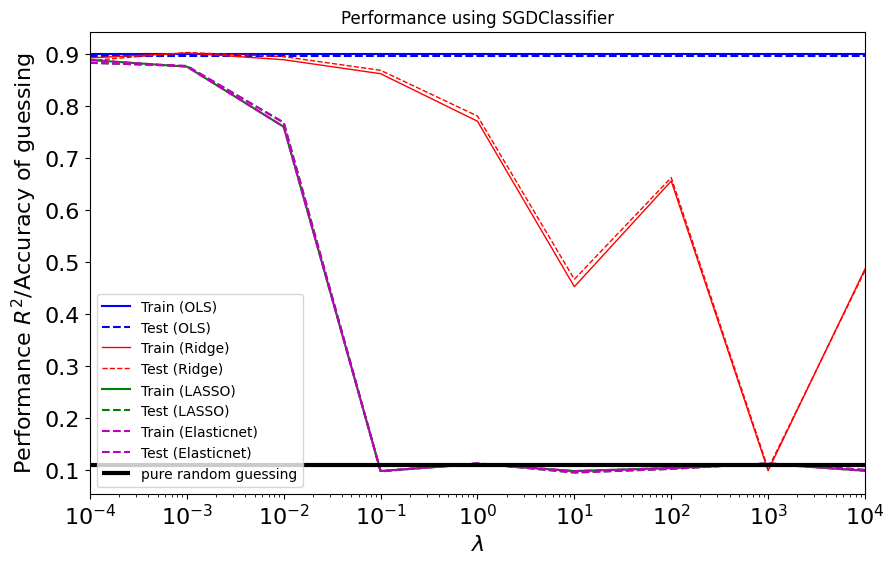

In [63]:
# Plot our performance on both the training and test data
plt.semilogx(lmbdas, train_errors_leastsq, 'b',label='Train (OLS)')
plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
plt.semilogx(lmbdas, train_errors_ridge,'r',label='Train (Ridge)',linewidth=1)
plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
plt.semilogx(lmbdas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.semilogx(lmbdas, train_errors_en, '--m',label='Train (Elasticnet)')
plt.semilogx(lmbdas, test_errors_en, '--m',label='Test (Elasticnet)')

fig = plt.gcf()
fig.set_size_inches(10.0, 6.0)

plt.hlines(1/9, xmin=min(lmbdas), xmax=max(lmbdas), color='k', linewidth=3, label='pure random guessing')
plt.legend()
#plt.ylim([-0.01, 1.01])
plt.xlim([min(lmbdas), max(lmbdas)])
plt.xlabel(r'$\lambda$',fontsize=16)
plt.ylabel('Performance $R^2$/Accuracy of guessing',fontsize=16)
plt.title('Performance using SGDClassifier')
plt.tick_params(labelsize=16)
plt.show()